In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from keras.models import Sequential
from keras.layers import Dense
import keras.activations,keras.optimizers,keras.losses

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
import seaborn as sn

from google.colab import drive
drive.mount('/content/drive')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import os

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAI-530/BotNeTIoT-L01_label_NoDuplicates.csv', engine='python')
print(data.head())

Mounted at /content/drive
   Unnamed: 0  MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
0           0            1.000000         98.000000          0.000000e+00   
1           1            1.931640         98.000000          1.818989e-12   
2           2            2.904273         86.981750          2.311822e+02   
3           3            3.902546         83.655268          2.040614e+02   
4           4            4.902545         81.685828          1.775746e+02   

   H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  HH_L0.1_weight  HH_L0.1_mean  \
0       1.000000    98.000000     0.000000e+00         1.00000          98.0   
1       1.931640    98.000000     1.818989e-12         1.93164          98.0   
2       2.904273    86.981750     2.311822e+02         1.00000          66.0   
3       3.902546    83.655268     2.040614e+02         1.00000          74.0   
4       4.902545    81.685828     1.775746e+02         2.00000          74.0   

    HH_L0.1_std  ...  HH_jit_L

In [ ]:


import pandas as pd



# Print unique values of the 'attack' column
print(data['Attack'].unique())

['gafgyt']


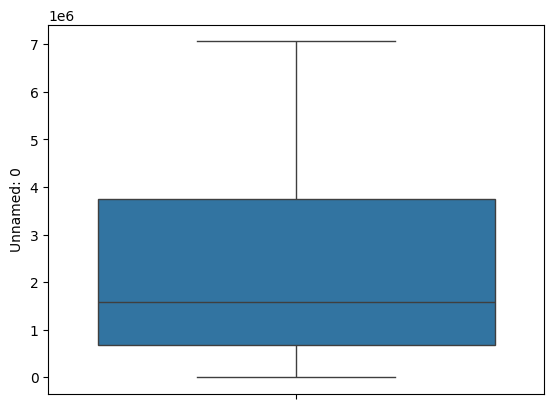

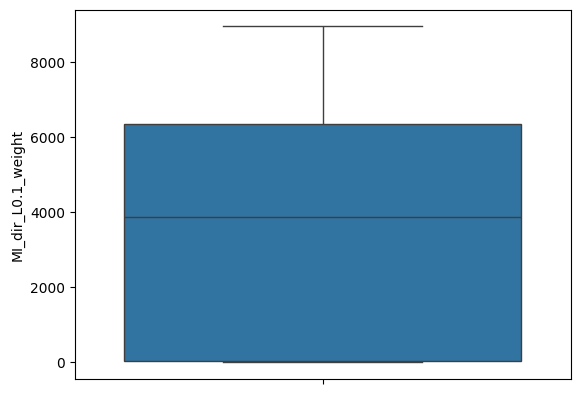

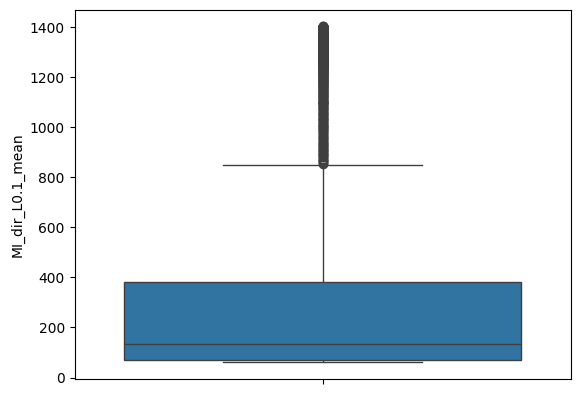

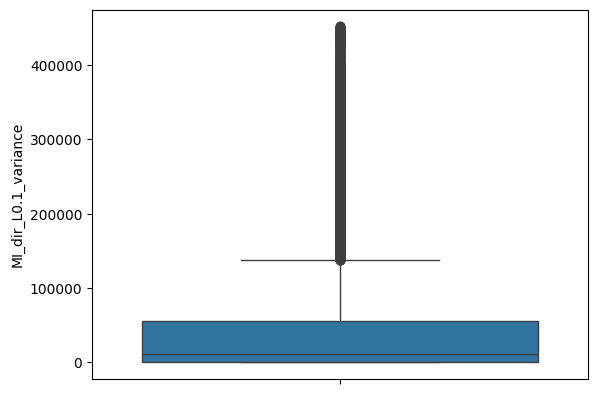

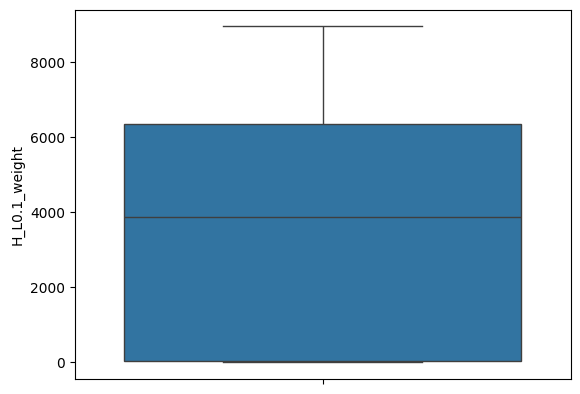

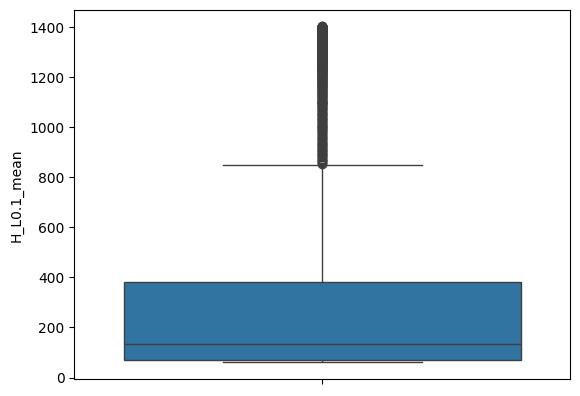

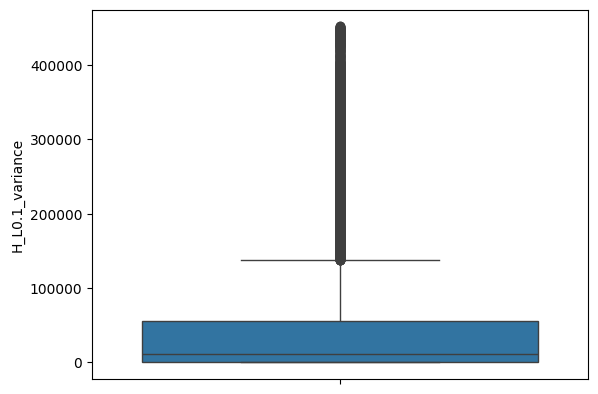

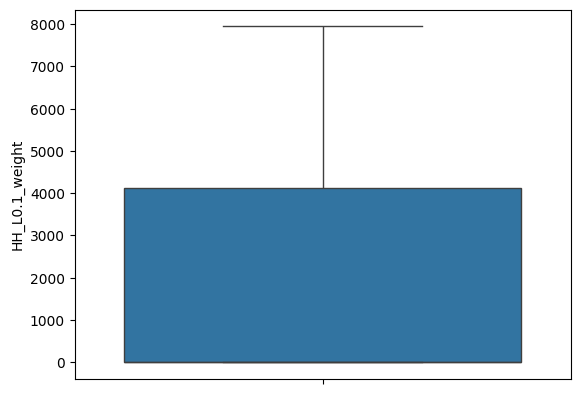

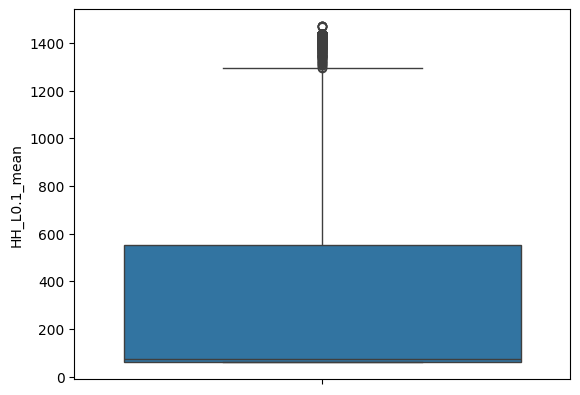

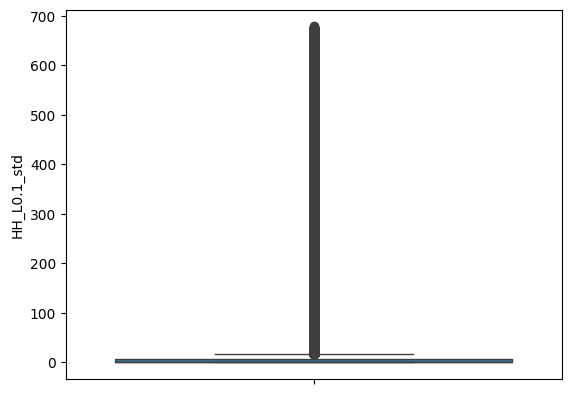

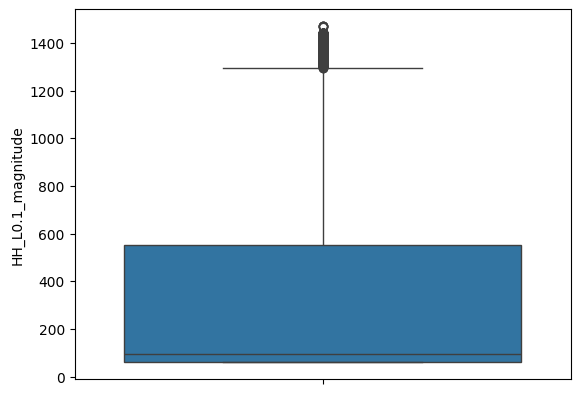

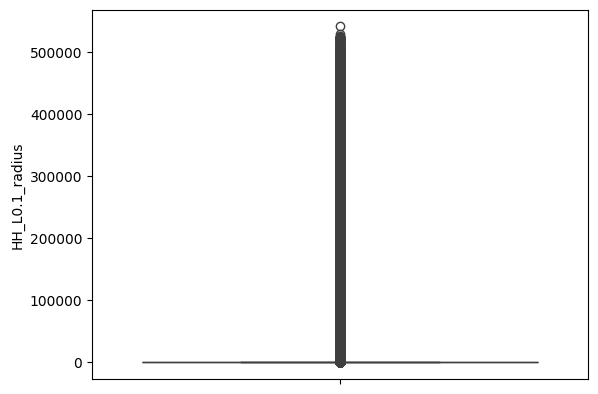

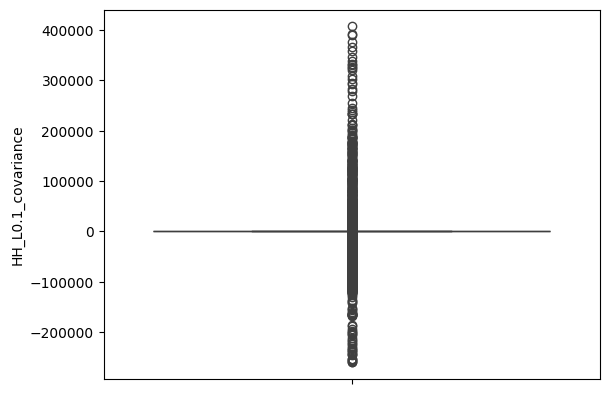

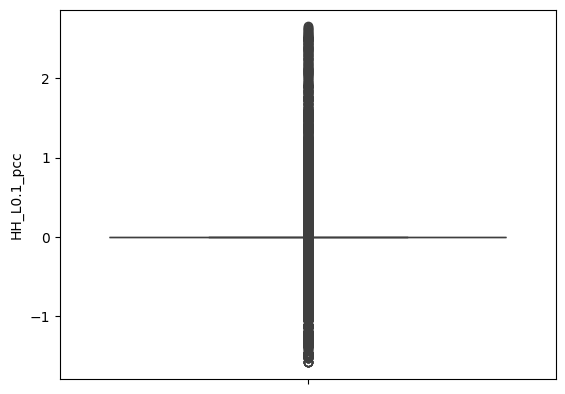

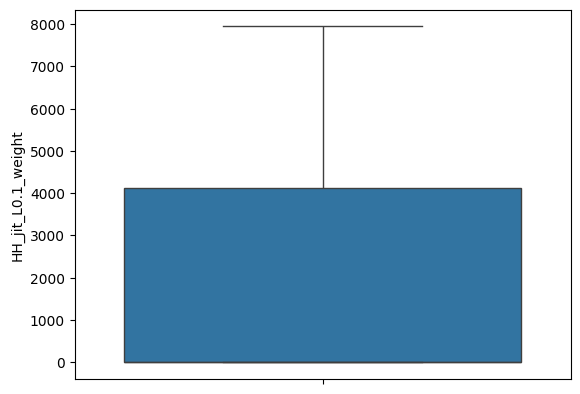

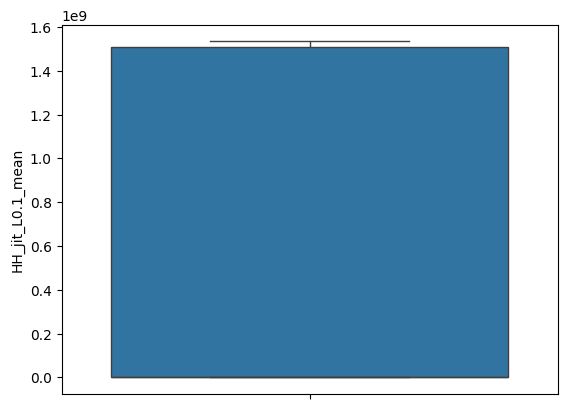

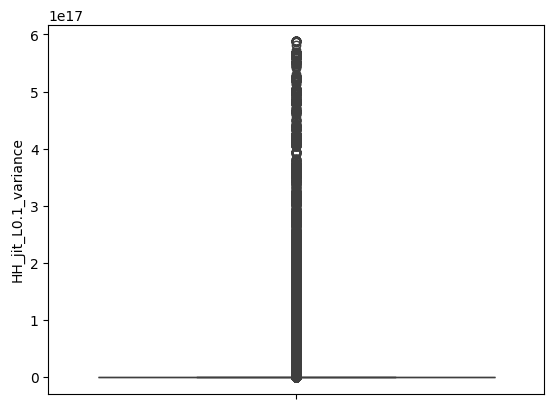

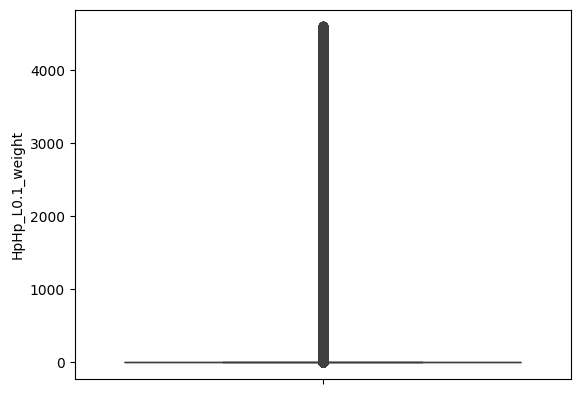

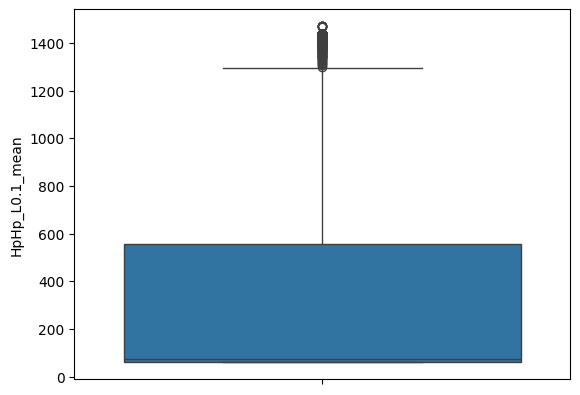

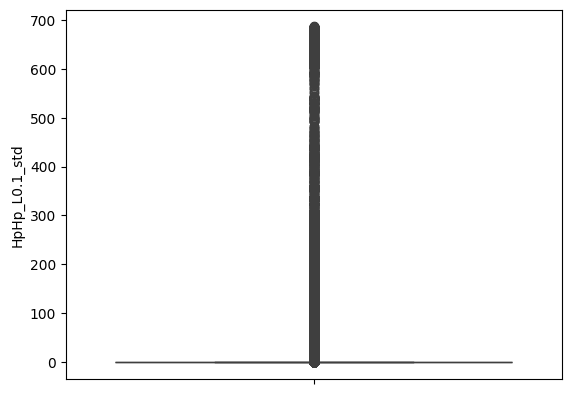

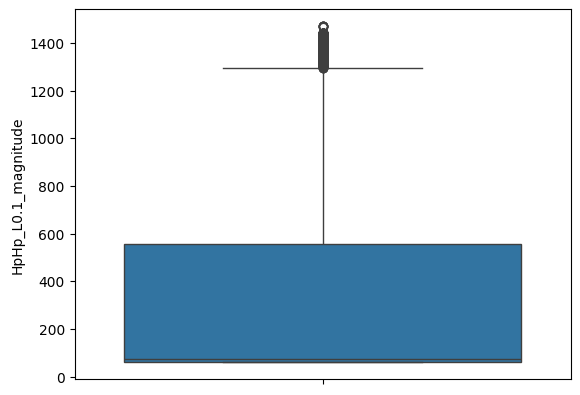

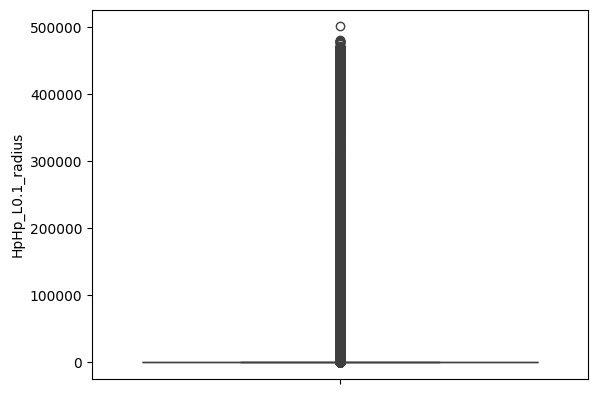

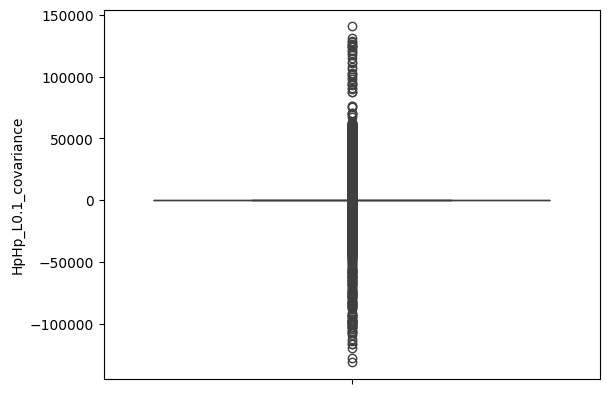

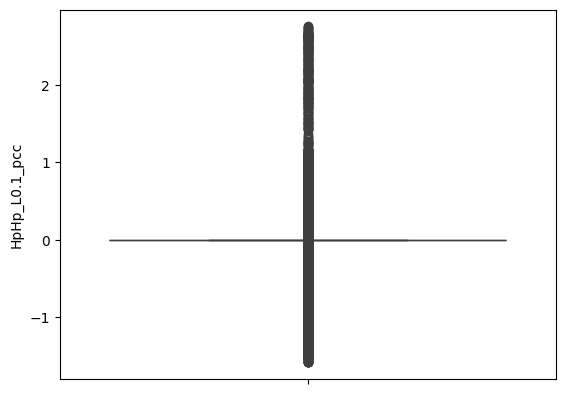

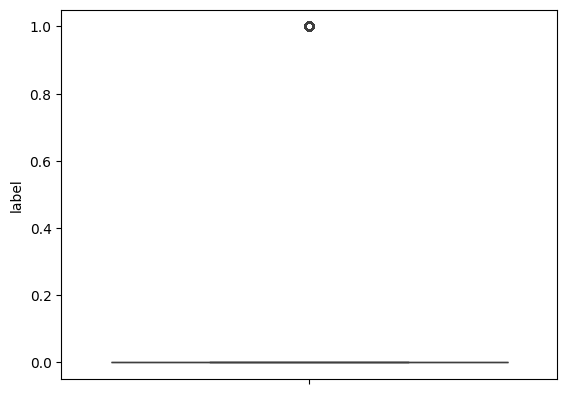

In [3]:
import seaborn as sn
for i in data.select_dtypes(include='number').columns.values:
    sn.boxplot(data[i])
    plt.show()

In [6]:


import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from keras.models import Sequential
from keras.layers import Dense
import keras.activations,keras.optimizers,keras.losses
from google.colab import drive
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from pandas.plotting import autocorrelation_plot
import os


drive.mount('/content/drive')


# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
#data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAI-530/BotNeTIoT-L01_label_NoDuplicates.csv', engine='python')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAI-530/BoTNeTIoT-L01-v2.csv', engine='python', chunksize=100)
chunk=data.get_chunk(10)
print(chunk)
chunk = chunk.dropna()

print(chunk)
data=chunk





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  H_L0.1_weight  \
0            1.000000         98.000000          0.000000e+00       1.000000   
1            1.931640         98.000000          1.818989e-12       1.931640   
2            2.904273         86.981750          2.311822e+02       2.904273   
3            3.902546         83.655268          2.040614e+02       3.902546   
4            4.902545         81.685828          1.775746e+02       4.902545   
5            5.902539         80.383706          1.558026e+02       5.902539   
6          613.818538         74.095096          2.659110e+00     613.818538   
7          614.778927         74.094941          2.654800e+00     614.778927   
8          615.618170         74.094787          2.650502e+00     615.618170   
9          616.596022         74.094633          2.646218e+00     616.5

In [7]:
import pandas as pd

print(data['Attack'].unique())


['gafgyt']


In [8]:
chunk['Attack']




,Attack
0,gafgyt
1,gafgyt
2,gafgyt
3,gafgyt
4,gafgyt
5,gafgyt
6,gafgyt
7,gafgyt
8,gafgyt
9,gafgyt


In [10]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'BoTNeTIoT-L01-v2.csv' is in your Google Drive
# and you've already mounted your Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/AAI-530/BoTNeTIoT-L01-v2.csv'

# Read the second half of the file
total_rows = sum(1 for _ in open(file_path))
half_point = total_rows // 2
df = pd.read_csv(file_path, skiprows=half_point, engine='python')

#Handle potential errors during file reading.
try:
    df = pd.read_csv(file_path, skiprows=range(1,half_point+1), engine='python')
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Check the file format and try again.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
else:
    #Preprocess the data
    df = df.dropna() # Remove rows with missing values

    # Convert 'Attack' column to numerical labels if needed
    le = LabelEncoder()
    df['Attack'] = le.fit_transform(df['Attack'])

    # Prepare data for linear regression
    X = df.drop('Attack', axis=1)
    y = df['Attack']

    #Convert non-numeric columns to numeric representation.
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])

    X = X.select_dtypes(include=np.number) #Only include numeric columns
    y = y.astype(int) #Convert to integers

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    # You can further analyze the results or use other evaluation metrics as needed.

Mean Squared Error: 0.5236330182518892


In [11]:
print(df['Attack'])
df['Attack'].value_counts()


0          2
1          2
2          2
3          2
4          2
          ..
3531298    0
3531299    0
3531300    0
3531301    0
3531302    0
Name: Attack, Length: 3531303, dtype: int64


,count
Attack,
2,1723598
1,1251773
0,555932


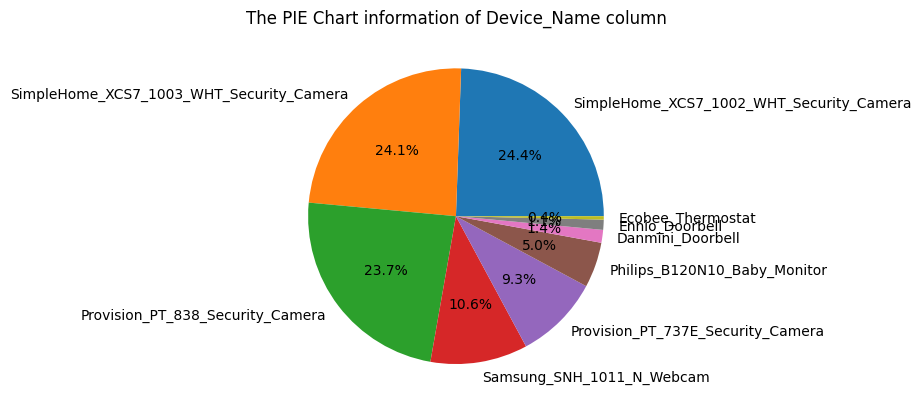

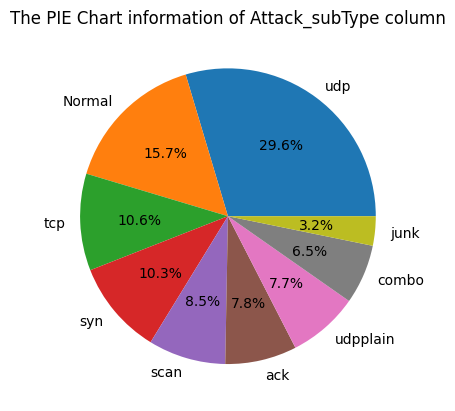

In [12]:
data = df
for i in data.select_dtypes(include='object').columns.values:
    if len(data[i].value_counts()) <=10:
        val=data[i].value_counts().values
        index=data[i].value_counts().index
        plt.pie(val,labels=index,autopct='%1.1f%%')
        plt.title(f'The PIE Chart information of {i} column')
        plt.show()

In [13]:
for i in data.select_dtypes(include='object').columns.values:
    print(data[i].value_counts())
    print("--------------------------------")


Device_Name
SimpleHome_XCS7_1002_WHT_Security_Camera    863056
SimpleHome_XCS7_1003_WHT_Security_Camera    850826
Provision_PT_838_Security_Camera            836891
Samsung_SNH_1011_N_Webcam                   375222
Provision_PT_737E_Security_Camera           328307
Philips_B120N10_Baby_Monitor                175240
Danmini_Doorbell                             49548
Ennio_Doorbell                               39100
Ecobee_Thermostat                            13113
Name: count, dtype: int64
--------------------------------
Attack_subType
udp         1045794
Normal       555932
tcp          374061
syn          363269
scan         299192
ack          276664
udpplain     273146
combo        229880
junk         113365
Name: count, dtype: int64
--------------------------------


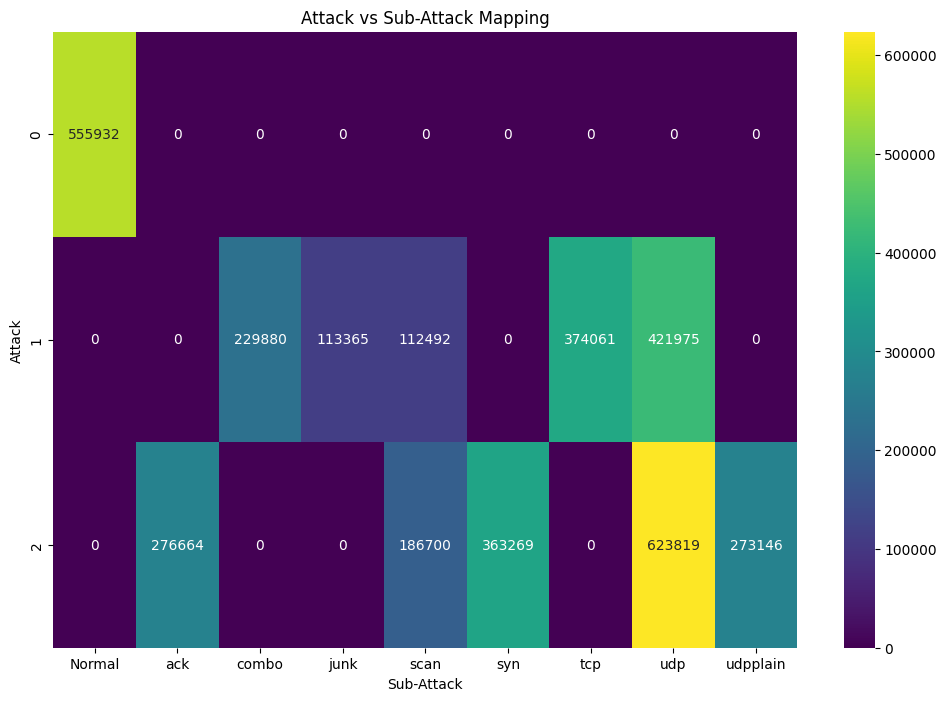

In [15]:


import matplotlib.pyplot as plt
import seaborn as sns


attack_subattack_counts = pd.crosstab(df['Attack'], df['Attack_subType'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(attack_subattack_counts, annot=True, fmt="d", cmap="viridis")
plt.title("Attack vs Sub-Attack Mapping")
plt.xlabel("Sub-Attack")
plt.ylabel("Attack")
plt.show()

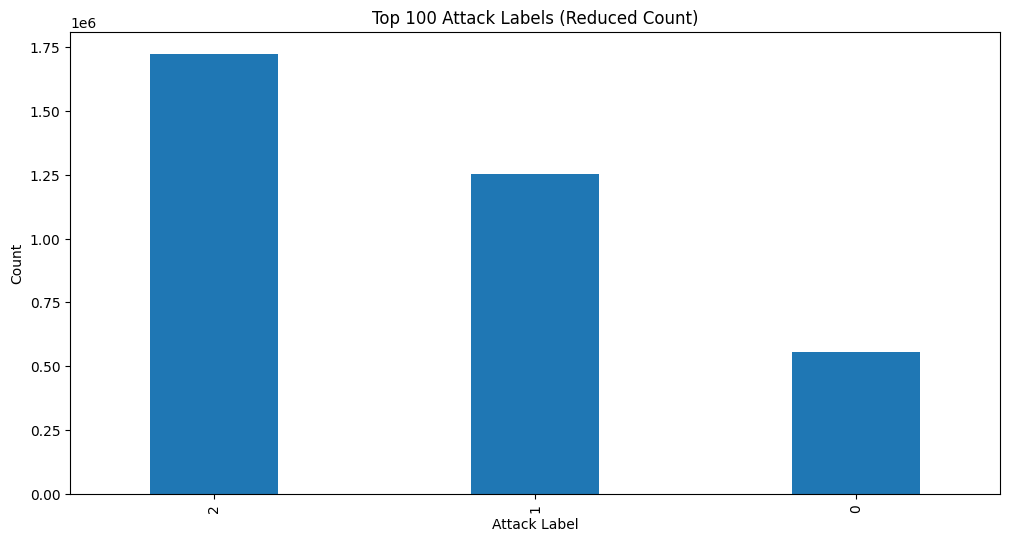

In [16]:


# Plot the top 100 attack labels with reduced count and bar width
attack_counts = df['Attack'].value_counts().head(100)
plt.figure(figsize=(12, 6))
attack_counts.plot(kind='bar', width=0.4)  # Reduce bar width
plt.title('Top 100 Attack Labels (Reduced Count)')
plt.xlabel('Attack Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:


print(df['Attack'].value_counts())

Attack
2    1723598
1    1251773
0     555932
Name: count, dtype: int64


In [17]:
lab=LabelEncoder()
for i in data.select_dtypes(include='object').columns.values:
    data[i]=lab.fit_transform(data[i])


In [22]:
x={}
X=[]
for i in data.columns.values:
    data['z-scores']=(data[i]-data[i].mean())/(data[i].std())
    outliers=np.abs(data['z-scores'] > 3).sum()
    x[i]=outliers


In [23]:
for keys,values in x.items():
    if values>0:
        X.append(keys)
print(x)

{'MI_dir_L0.1_weight': 0, 'MI_dir_L0.1_mean': 894, 'MI_dir_L0.1_variance': 4707, 'H_L0.1_weight': 0, 'H_L0.1_mean': 894, 'H_L0.1_variance': 4707, 'HH_L0.1_weight': 0, 'HH_L0.1_mean': 1371, 'HH_L0.1_std': 61357, 'HH_L0.1_magnitude': 4490, 'HH_L0.1_radius': 54578, 'HH_L0.1_covariance': 5530, 'HH_L0.1_pcc': 58038, 'HH_jit_L0.1_weight': 0, 'HH_jit_L0.1_mean': 0, 'HH_jit_L0.1_variance': 74302, 'HpHp_L0.1_weight': 109432, 'HpHp_L0.1_mean': 1831, 'HpHp_L0.1_std': 37451, 'HpHp_L0.1_magnitude': 5622, 'HpHp_L0.1_radius': 33699, 'HpHp_L0.1_covariance': 24071, 'HpHp_L0.1_pcc': 32664, 'Device_Name': 0, 'Attack': 0, 'Attack_subType': 0, 'label': 0, 'z-scores': 0}


In [24]:
x=[]

thresh=2
for i in data[X].columns.values:
    upper=data[i].mean()+thresh*data[i].std()
    lower=data[i].mean()-thresh*data[i].std()
    data2=data[(data[i]>lower)&(data[i]<upper)]

print(len(data))
print(data)

3531303
         MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
0               3102.162512         67.503270             48.964091   
1               3102.892660         67.505364             48.961909   
2               3103.892660         67.507456             48.959720   
3               3104.892454         67.509547             48.957524   
4               3105.238049         67.511637             48.955319   
...                     ...               ...                   ...   
3531298            2.937269        217.763487          17706.823640   
3531299            1.730254        282.630543          10545.887900   
3531300            2.730251        299.980395           7204.116620   
3531301            2.882414        216.723647          17753.083150   
3531302            2.032574        154.377267          13032.487600   

         H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  HH_L0.1_weight  \
0          3102.162512    67.503270        48.964091     1653.07295

In [25]:
data['Attack']

,Attack
0,2
1,2
2,2
3,2
4,2
...,...
3531298,0
3531299,0
3531300,0
3531301,0


In [26]:



print(data['Attack'].value_counts())

Attack
2    1723598
1    1251773
0     555932
Name: count, dtype: int64


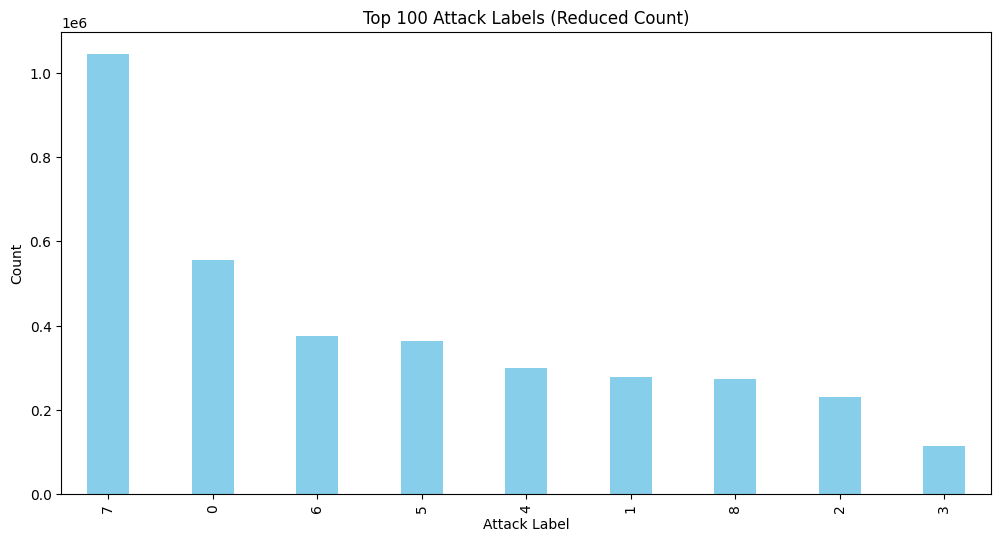

In [27]:


# Plot the top 100 attack labels with reduced count and bar width, with customized color
attack_counts = df['Attack_subType'].value_counts().head(100)
plt.figure(figsize=(12, 6))
attack_counts.plot(kind='bar', width=0.4, color='skyblue')  # Set the color to skyblue
plt.title('Top 100 Attack Labels (Reduced Count)')
plt.xlabel('Attack Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()